# Week 5 - More Classification

## Multinomial Logistic Regression

In [1]:
# iris dataset
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

penguins = sns.load_dataset('penguins')
penguins.dropna(inplace=True)
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [2]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(penguins.drop(['species', 'island'], axis=1), penguins['species'], test_size=0.25, random_state=42)
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
321,55.9,17.0,228.0,5600.0,Male
265,43.6,13.9,217.0,4900.0,Female
36,38.8,20.0,190.0,3950.0,Male
308,47.5,14.0,212.0,4875.0,Female
191,53.5,19.9,205.0,4500.0,Male


In [3]:
# mapping female male
X_train['sex'] = X_train['sex'].map({'Female':0,'Male':1})
X_test['sex'] = X_test['sex'].map({'Female':0,'Male':1})

In [4]:
# create model https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Test Score: {accuracy_score(y_test, y_pred)}')

[[39  1  0]
 [ 0 15  0]
 [ 0  0 29]]
Training Score: 0.9919678714859438
Test Score: 0.9880952380952381


### Test Statistics

* tn = pred 0 actual 0
* fp = pred 1 actual 0
* fn = pred 0 actual 1
* tp = pred 1 actual 1

In [5]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(y_test, y_pred)

array([[[44,  0],
        [ 1, 39]],

       [[68,  1],
        [ 0, 15]],

       [[55,  0],
        [ 0, 29]]], dtype=int64)

In [6]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
print(confusion_matrix(y_true, y_pred))
print()
print(multilabel_confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"]))

[[2 0 0]
 [0 0 1]
 [1 0 2]]

[[[3 1]
  [0 2]]

 [[5 0]
  [1 0]]

 [[2 1]
  [1 2]]]


## Model Comparisons

In [7]:
# get data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/sudarshan-koirala/K-Nearest-Neighbors-Social-Network-Ads/master/Social_Network_Ads.csv')
print(df.shape)
print(df.head())

(400, 5)
    User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB
None


In [9]:
# get X and y and train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['User ID', 'Gender', 'Purchased'], axis=1), df.Purchased, 
                                                            test_size=0.2, random_state=42)

In [10]:
# scale data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train.values)
X_test = sc.transform(X_test.values)

## Logistic Regression

[[50  2]
 [ 9 19]]
0.8625


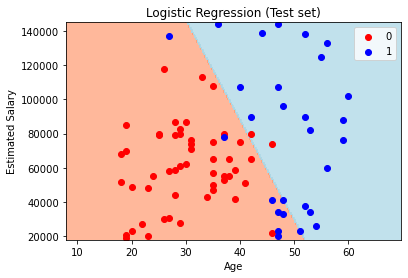

In [11]:
# model, predict, evaluate, and plot
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('lightsalmon', 'lightblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'blue'))(i), label = j)
    
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## K Nearest Neighbor

* https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#/media/File:KnnClassification.svg
* Choose the number of K neighbors
* Within the perimeter, count the number of each class
* New data point is assigned the class with the highest count

In [12]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[48  4]
 [ 3 25]]
0.9125


## Support Vector Classifier

* https://en.wikipedia.org/wiki/Support-vector_machine#/media/File:SVM_margin.png
* Linearly separable
* Identify the hyperplane (similar to line of best fit used in regression)
* Find the support vectors
* Maximize the margin
* Identify negative and positive hyperplanes
* Compares apples that look like oranges and vice versa that reside near the margin (support vectors)


In [13]:
from sklearn.svm import SVC

model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[50  2]
 [ 9 19]]
0.8625


## SVC with Kernel Trick

* https://miro.medium.com/max/1400/1*mCwnu5kXot6buL7jeIafqQ.png (https://medium.com/@zxr.nju/what-is-the-kernel-trick-why-is-it-important-98a98db0961d)
* Non linear
* Maps classes to different dimensions
* https://vitalflux.com/machine-learning-svm-kernel-trick-example/
* Example - exponential curve can be used to make something linearly separable
* The kernel trick

In [14]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[47  5]
 [ 1 27]]
0.925


## Naive Bayes

* https://medium.com/@abhishek.km23/naive-bayes-classifier-calculation-of-prior-likelihood-evidence-posterior-74d7d27eec24
* 10 walks (not purchased)
* 20 drives (purchased)
* how to classify a datapoint in between (4 points are similar)

#### p(walks|x)
* prior = 10 / 30 p(walks)
* likelihood = 3 / 10 p(x|walks)
* marginal likelihood = 4 / 30 p(B)
* = .75

#### p(drives|x)
* prior = 20 / 30 p(drives)
* likelihood = 1 / 20 p(x|drives)
* marginal likelihood = 4 / 30 p(B)
* = 1 - .75 = .25

In [15]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[50  2]
 [ 3 25]]
0.9375


## Decision Tree Classifier

* https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

#### Terms

* Root node
* Splitting
* Decision node
* Leaf / terminal node
* Pruning
* Branch
* Parent and child nodes

#### Attribute Selection Measures

* Entropy
* Information gain
* Gini index
* Gain ration
* Reduction in variance
* Chi-square

More next week

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[46  6]
 [ 7 21]]
0.8375


## Random Forest Classifier

* Random sample of X_train when building trees
* Random subsets of features
* Bagging

More next week

In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[47  5]
 [ 6 22]]
0.8625


## XGBoost